In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

In [71]:
df = pd.read_csv('data/p2_arbres_fr.csv', sep=';')  # Creating the dataframe

## Mark Missing Values

In [72]:
# count the number of missing values for each column
num_missing = (df[['hauteur_m', 'circonference_cm']] == 0).sum()
# report the results
print(num_missing)

hauteur_m           39219
circonference_cm    25867
dtype: int64


marking missing values with nan values

In [75]:
# replace '0' values with 'nan'
df[['hauteur_m','circonference_cm']] = df[['hauteur_m','circonference_cm']].replace(0, np.nan)

summarize the number of rows with missing values for each column

In [76]:
df[['hauteur_m', 'circonference_cm']].isnull().sum()

hauteur_m           39219
circonference_cm    25867
dtype: int64

[Records hauteur des arbres a Paris](https://www.monumentaltrees.com/fr/recordsdhauteur/fra/paris/)

In [77]:
len(df[df['hauteur_m'] >= 50])

458

In [79]:
df[df['hauteur_m'] >= 50] = np.nan

## Identify outliers with boxplot

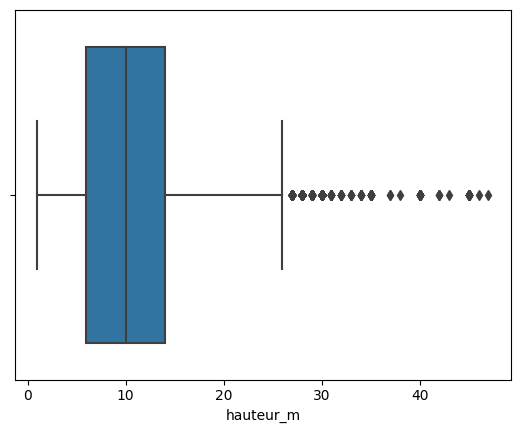

In [80]:
import seaborn as sb

sns.boxplot(x=df['hauteur_m']);

## Standard Deviation Method

In [81]:
# calculate summary statistics
data_mean, data_std = np.mean(df.hauteur_m), np.std(df.hauteur_m)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(data_mean, data_std, lower, upper)

10.366945033030039 5.166432488376888 -5.132352432100625 25.8662424981607


In [82]:
# identify outliers
outliers = [x for x in df.hauteur_m if x < lower or x > upper]
min(outliers)
# max(outliers)

26.0

## Interquartile Range Method

In [83]:
from numpy import percentile
# calculate interquartile range
data = df.hauteur_m[df.hauteur_m.notnull()]
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=6.000, 75th=14.000, IQR=8.000


In [84]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper] 
print('Identified outliers: %d' % len(outliers))
outliers.sort()
min(outliers)

Identified outliers: 934


26.0